In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Загрузим  данные

In [7]:
df = pd.read_csv('forestfires.csv')
print(df.shape)
df.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Распределение по area

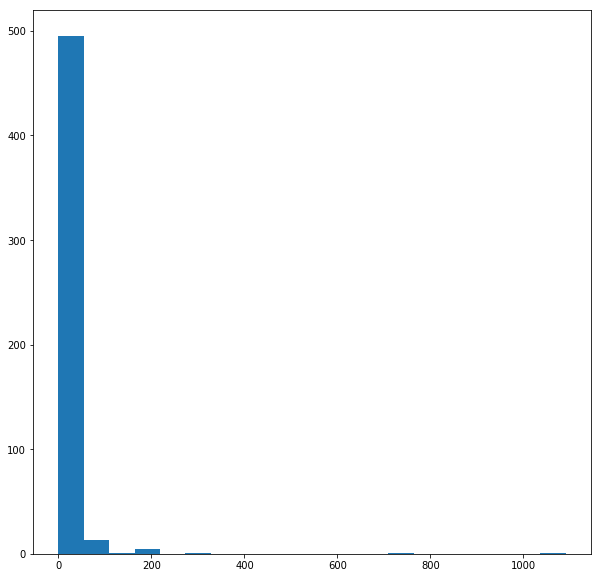

In [11]:
plt.figure(figsize=(10,10))
plt.hist(df['area'], bins = 20)
plt.show()

Расположение

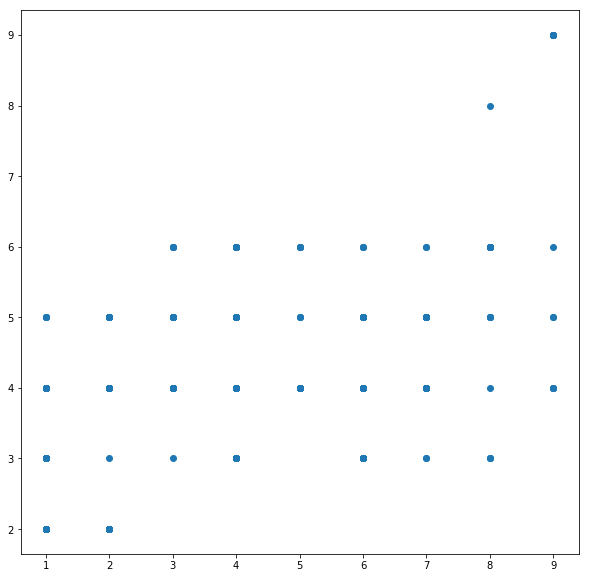

In [17]:
plt.figure(figsize=(10,10))
plt.plot(df['X'], df['Y'], 'o')
plt.show()

# Работа с данными

## One Hot Encoding

Сделаем из категориальных признаков бинарные

In [29]:
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])

In [30]:
le = LabelEncoder()
df['day'] = le.fit_transform(df['day'])

In [48]:
ohe = OneHotEncoder(sparse=False)
day_ohe = ohe.fit_transform(df['day'].values.reshape(-1, 1))
day_ohe_df = pd.DataFrame(day_ohe, columns=['day_{}'.format(i) for i in range(day_ohe.shape[1])])
day_ohe_df.head()

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
ohe = OneHotEncoder(sparse=False)
month_ohe = ohe.fit_transform(df['month'].values.reshape(-1, 1))
month_ohe_df = pd.DataFrame(month_ohe, columns=['month_{}'.format(i) for i in range(month_ohe.shape[1])])
month_ohe_df.head()

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
df = pd.concat([df.drop(['day', 'month'], axis = 1), month_ohe_df, day_ohe_df], axis = 1)
print(df.shape)
df.head()

(517, 30)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_9,month_10,month_11,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
X_col = [col for col in df.columns if col != 'area']

In [64]:
X = df[X_col]
y = df['area']

# Логистическая регрессия с L2-регуляризацией

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [118]:
alfa = np.arange(0.005, 10, 0.005)
scores = []
for a in alfa:
    lr = Ridge(a)
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    scores.append(mean_squared_error(pred, y_test))

Зависимость ошибки от коэфициента регуляризации:

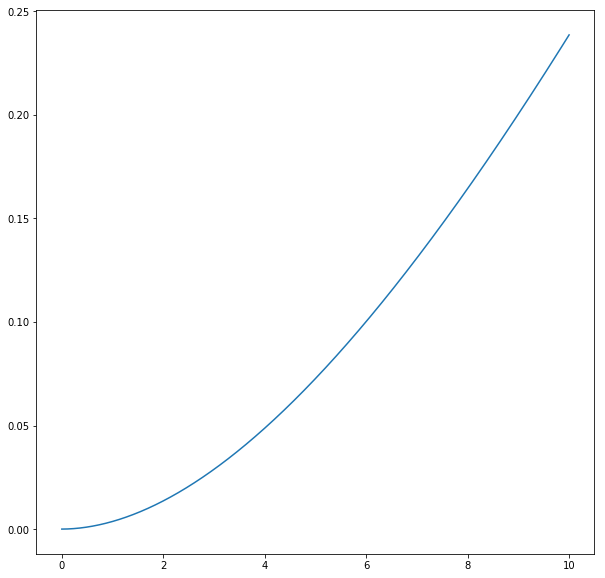

In [121]:
plt.figure(figsize=(10, 10))
plt.plot(alfa, scores)
plt.show()

Зафисимость ошибки от логарифма коэфициента регуляризации:

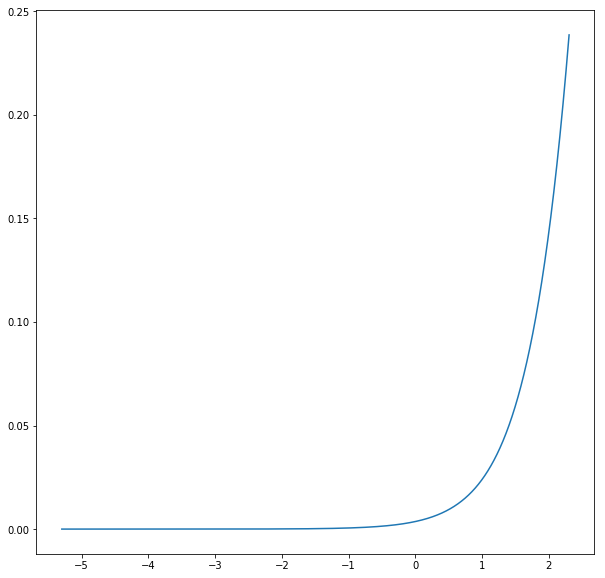

In [120]:
plt.figure(figsize=(10, 10))
plt.plot(np.log(alfa), scores)
plt.show()